# Machine Learning Model Deployment

# Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data Analysis and Preprocessing

## Data Exploration

In [4]:
data.shape

(20640, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Handle Missing Values

In [7]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [8]:
data.isnull().mean() * 100

,0
longitude,0.000000
latitude,0.000000
housing_median_age,0.000000
total_rooms,0.000000
total_bedrooms,1.002907
population,0.000000
households,0.000000
median_income,0.000000
median_house_value,0.000000
ocean_proximity,0.000000


In [9]:
# Missing values in total_bedrooms <5% so remove values
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Split data into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [12]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [13]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
train_data = X_train.join(y_train)

In [40]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10424,-117.63,33.45,5.0,3549.0,604.0,1571.0,534.0,5.3705,NEAR OCEAN,363500.0
14713,-117.04,32.80,25.0,2504.0,345.0,1067.0,350.0,5.7416,<1H OCEAN,243400.0
15387,-117.05,33.29,17.0,1800.0,312.0,891.0,281.0,7.0177,<1H OCEAN,267600.0
3131,-117.98,35.10,4.0,923.0,166.0,352.0,135.0,4.5724,INLAND,84500.0
2163,-119.82,36.77,41.0,1441.0,274.0,646.0,296.0,3.0568,INLAND,71300.0
...,...,...,...,...,...,...,...,...,...,...
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,254500.0
17413,-120.59,34.70,29.0,17738.0,3114.0,12427.0,2826.0,2.7377,NEAR OCEAN,28300.0
8632,-118.40,33.88,36.0,1543.0,214.0,474.0,187.0,9.3399,<1H OCEAN,500001.0
17110,-122.21,37.46,40.0,1777.0,207.0,577.0,207.0,15.0001,NEAR OCEAN,500001.0


## Visualization

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

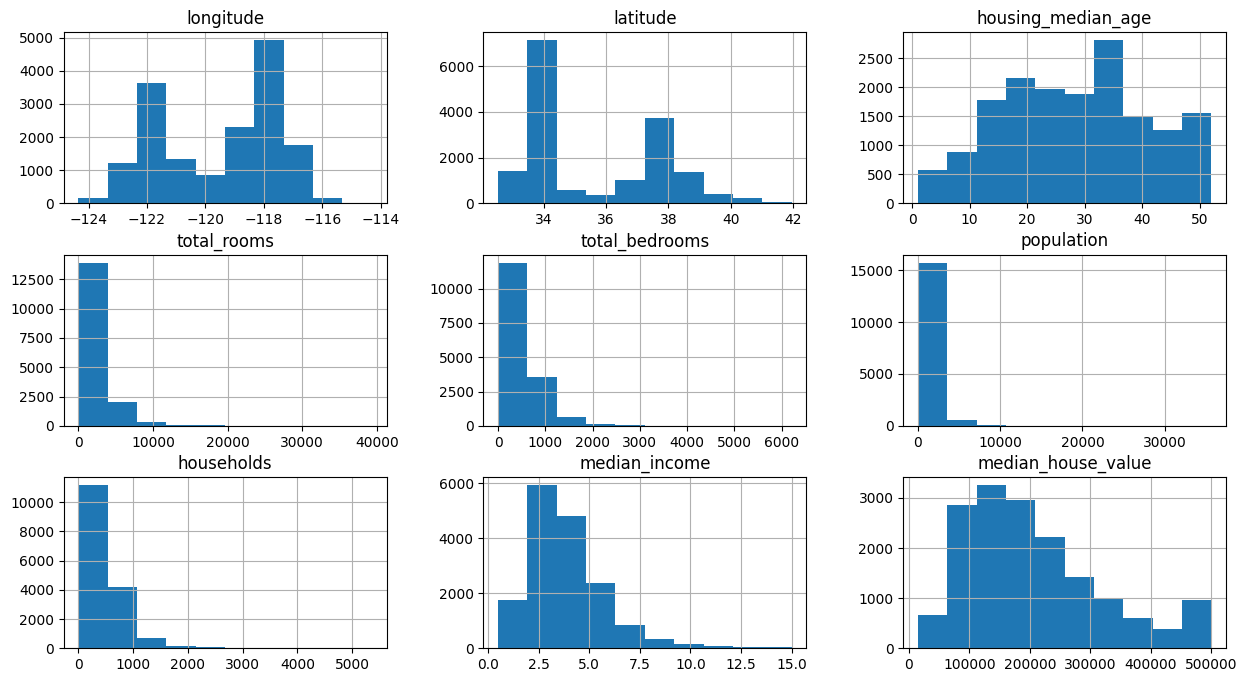

In [41]:
train_data.hist(figsize=(15, 8))

<Axes: >

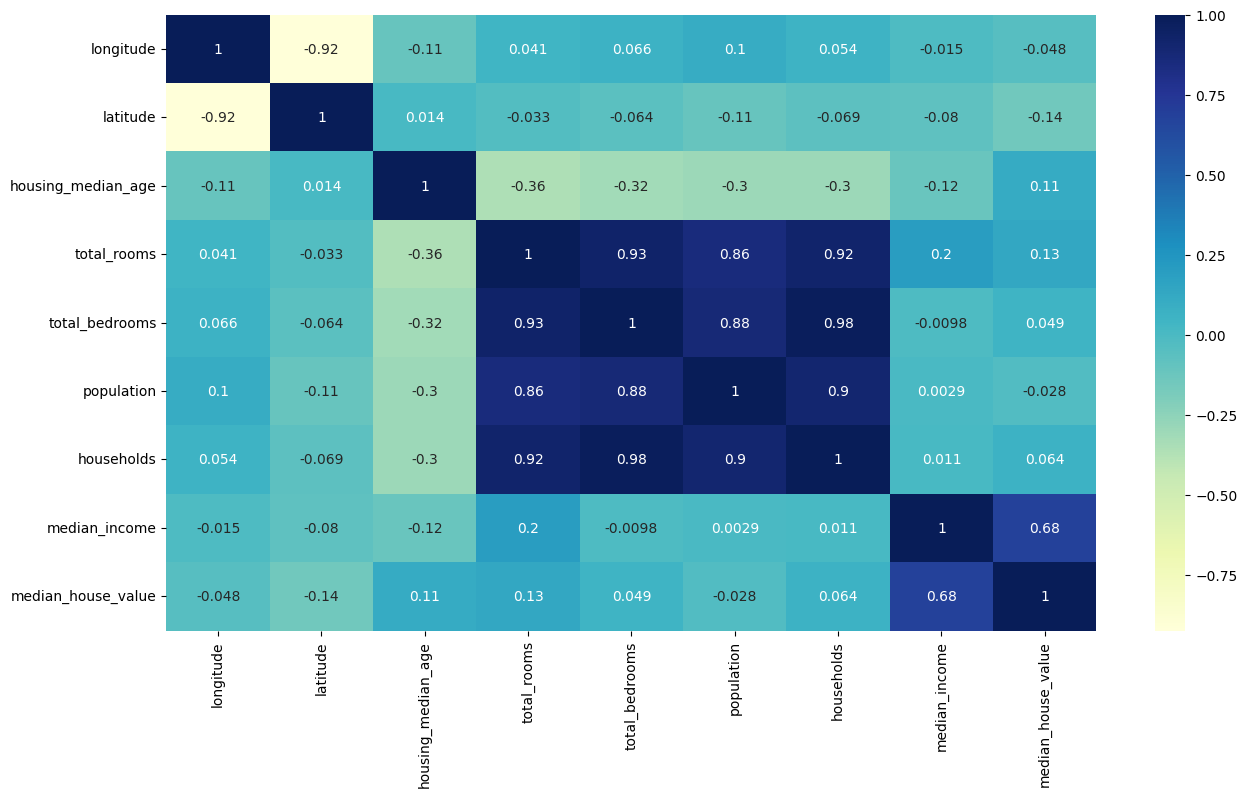

In [18]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

## Data Preprocessing

In [42]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

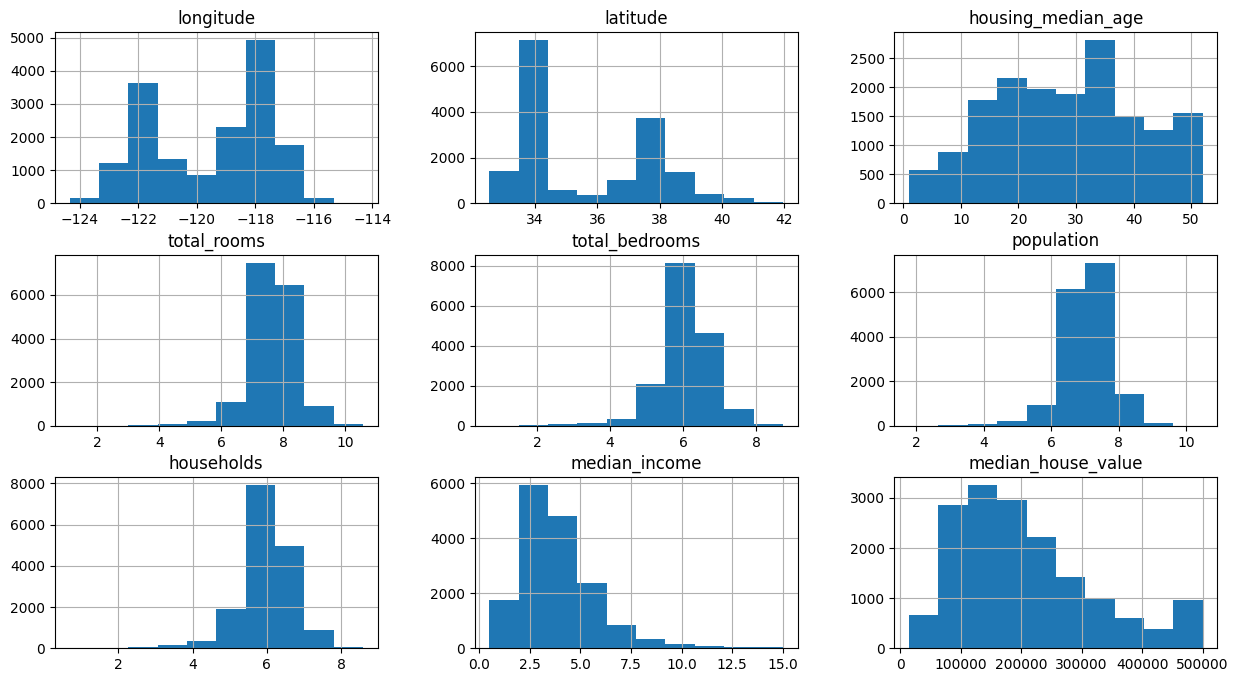

In [43]:
train_data.hist(figsize=(15, 8))

In [45]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'],dtype=int)).drop(['ocean_proximity'], axis=1)

In [46]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10424,-117.63,33.45,5.0,8.174703,6.405228,7.360104,6.282267,5.3705,363500.0,0,0,0,0,1
14713,-117.04,32.80,25.0,7.826044,5.846439,6.973543,5.860786,5.7416,243400.0,1,0,0,0,0
15387,-117.05,33.29,17.0,7.496097,5.746203,6.793466,5.641907,7.0177,267600.0,1,0,0,0,0
3131,-117.98,35.10,4.0,6.828712,5.117994,5.866468,4.912655,4.5724,84500.0,0,1,0,0,0
2163,-119.82,36.77,41.0,7.273786,5.616771,6.472346,5.693732,3.0568,71300.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,-118.59,34.23,17.0,8.793764,7.330405,8.402904,7.288928,3.0347,254500.0,1,0,0,0,0
17413,-120.59,34.70,29.0,9.783521,8.043984,9.427707,7.946971,2.7377,28300.0,0,0,0,0,1
8632,-118.40,33.88,36.0,7.342132,5.370638,6.163315,5.236442,9.3399,500001.0,1,0,0,0,0
17110,-122.21,37.46,40.0,7.483244,5.337538,6.359574,5.337538,15.0001,500001.0,0,0,0,0,1


<Axes: >

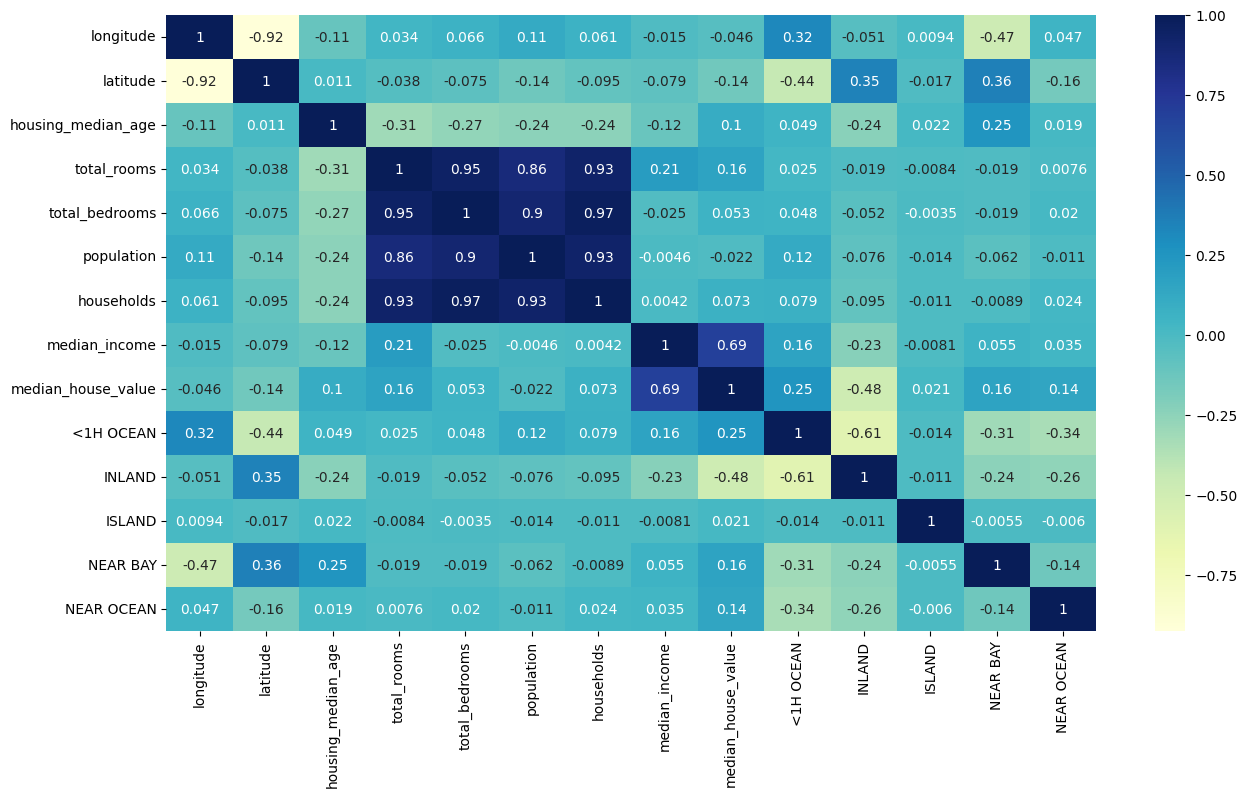

In [47]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

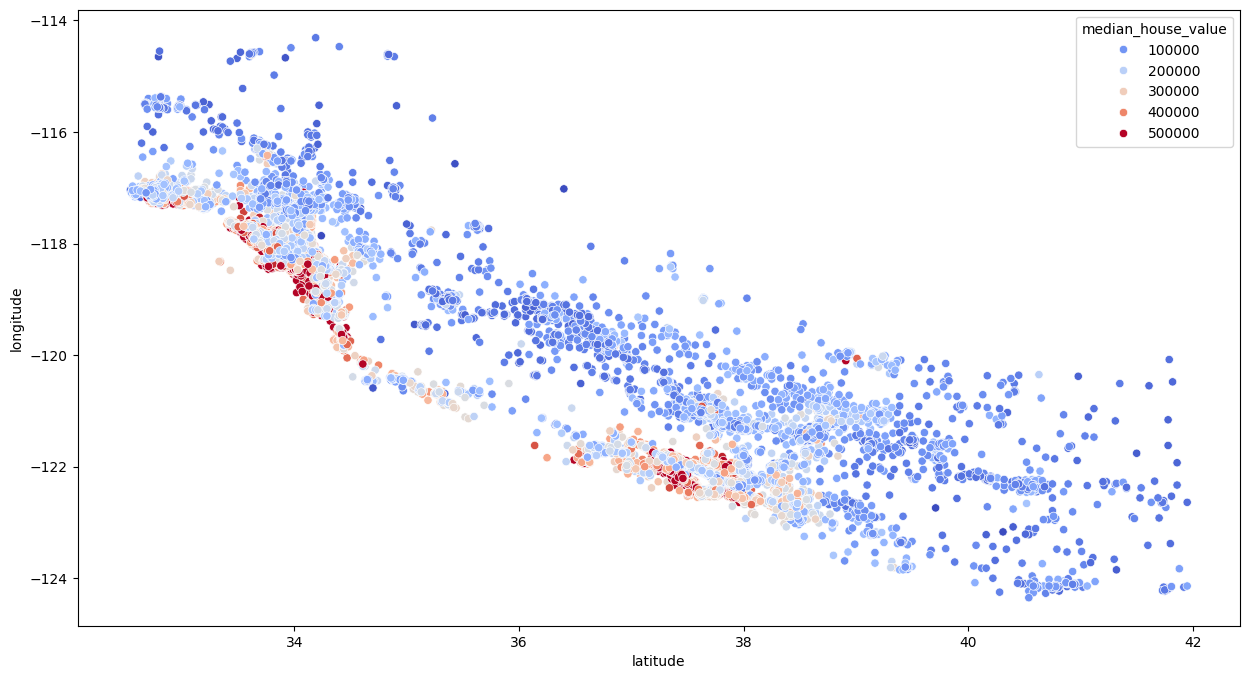

In [49]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', hue='median_house_value', data=train_data, palette="coolwarm")

## Feature Engineering

In [50]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

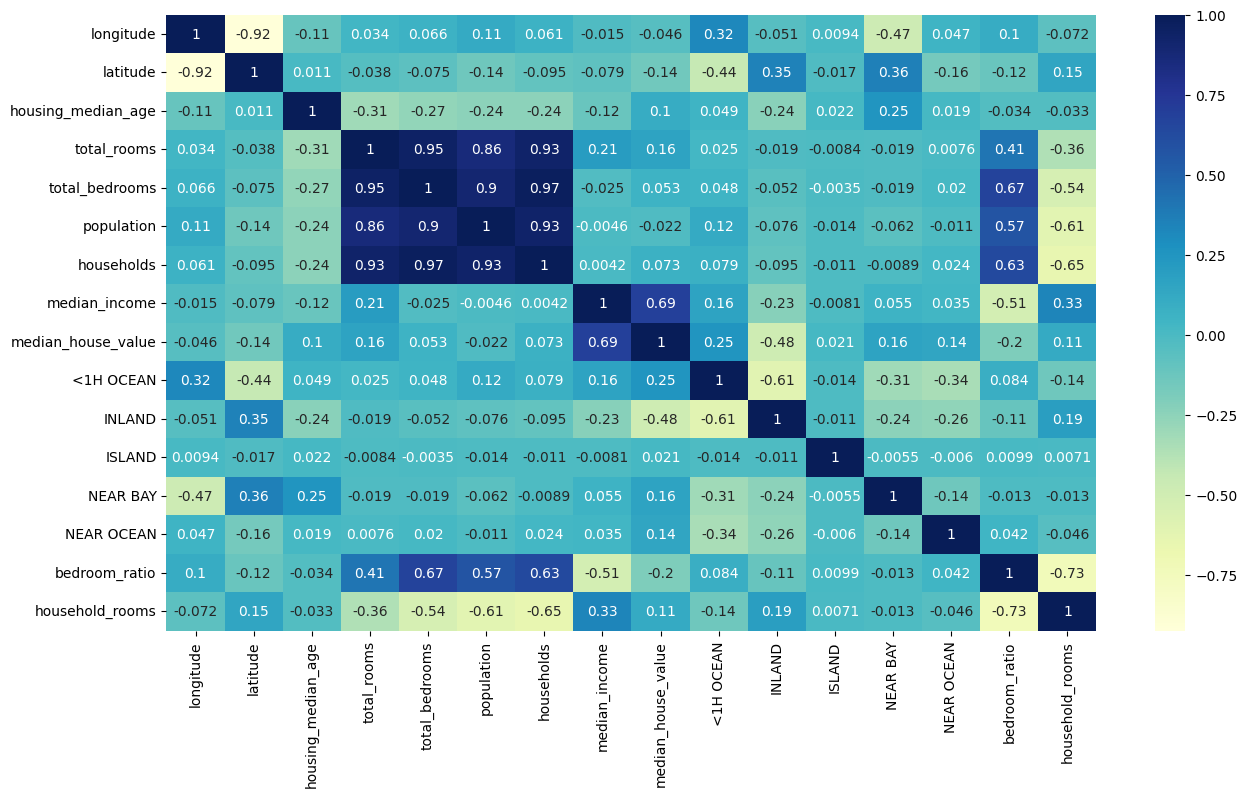

In [51]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

# Model Training

## Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [53]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'],dtype=int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [60]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [63]:
X_test_s = scaler.transform(X_test)

In [64]:
reg.score(X_test_s, y_test)

0.6845539167020824

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train_s, y_train)

RandomForestRegressor()

In [83]:
rf.score(X_test_s, y_test)

0.8281025872406822

## Cross-Validation for Model Evaluation

In [76]:
from sklearn.model_selection import cross_val_score

# For Linear Regression
cv_scores_reg = cross_val_score(reg, X_train_s, y_train, cv=5, scoring='r2')
print("Linear Regression CV R² scores:", cv_scores_reg)
print("Mean CV R²:", cv_scores_reg.mean())

# For Random Forest
cv_scores_rf = cross_val_score(rf, X_train_s, y_train, cv=5, scoring='r2')
print("Random Forest CV R² scores:", cv_scores_rf)
print("Mean CV R²:", cv_scores_rf.mean())

Linear Regression CV R² scores: [0.67203    0.65957764 0.64076889 0.68168564 0.67497406]
Mean CV R²: 0.6658072448742726
Random Forest CV R² scores: [0.80054613 0.81242112 0.78415175 0.82454255 0.8146873 ]
Mean CV R²: 0.8072697694830001


## Compare Model Performance using Metrics

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Re-fit the Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train_s, y_train)

# Predictions
reg_preds = reg.predict(X_test_s)
rf_preds = rf.predict(X_test_s)

# Linear Regression
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, reg_preds))
print("MSE:", mean_squared_error(y_test, reg_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, reg_preds)))
print("R²:", reg.score(X_test_s, y_test))

# Random Forest
print("Random Forest:")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("MSE:", mean_squared_error(y_test, rf_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("R²:", rf.score(X_test_s, y_test))

Linear Regression:
MAE: 47657.92114720668
MSE: 4289261168.4138665
RMSE: 65492.451232289866
R²: 0.6845539167020824
Random Forest:
MAE: 31739.233100073405
MSE: 2335721566.6398883
RMSE: 48329.3033949372
R²: 0.82822351194262


## Save the train model

In [87]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(rf, f)